# Daten importieren

In [ ]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("career_progression_data.csv")
df

,Education Level,Workplace Location,Years of Work Experience,Income Level
0,Bachelor's Degree,Rural Area,4.1,Low
1,High School,Suburban Area,19.1,High
2,Master's Degree,Suburban Area,7.2,Medium
3,High School,Suburban Area,14.2,High
4,High School,Urban Area,11.0,Low
...,...,...,...,...
219,High School,Urban Area,3.7,Medium
220,High School,Suburban Area,12.4,High
221,High School,Urban Area,1.0,Low
222,Master's Degree,Rural Area,1.0,High


In [ ]:
# Schritt 2: Analysiere die Daten mithilfe von '.describe()'
df.describe()

,Years of Work Experience
count,224.000000
mean,10.007143
std,4.652965
min,1.000000
25%,6.875000
50%,10.100000
75%,13.300000
max,23.800000


# Verteilung visualisieren

<Axes: xlabel='Years of Work Experience', ylabel='Count'>

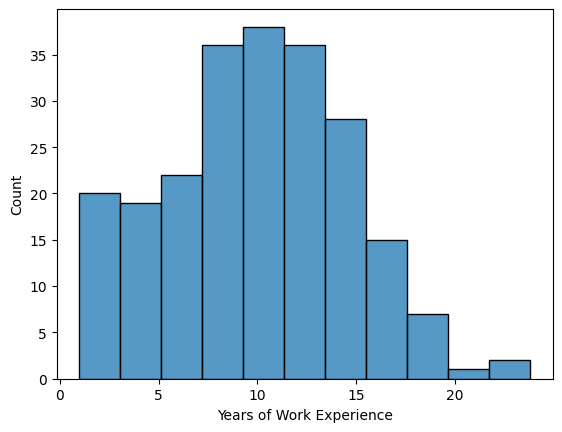

In [ ]:
import seaborn as sns

# Schritt 3: Visualisiere die Verteilung der Spalte "Years of Work Experience" mithifle eines Histogramms.
sns.histplot(df["Years of Work Experience"])

# Daten aufteilen

In [ ]:
# Schritt 4: Weise die entsprechenden Features der Eingabevariable X und das zugehörige Ziel der Zielvariable y zu.
# Tipp: Verwende '.copy()' und '.pop()'.
X = df.copy()
y = X.pop("Income Level")

In [ ]:
X

,Education Level,Workplace Location,Years of Work Experience
0,Bachelor's Degree,Rural Area,4.1
1,High School,Suburban Area,19.1
2,Master's Degree,Suburban Area,7.2
3,High School,Suburban Area,14.2
4,High School,Urban Area,11.0
...,...,...,...
219,High School,Urban Area,3.7
220,High School,Suburban Area,12.4
221,High School,Urban Area,1.0
222,Master's Degree,Rural Area,1.0


In [ ]:
y

0         Low
1        High
2      Medium
3        High
4         Low
        ...  
219    Medium
220      High
221       Low
222      High
223      High
Name: Income Level, Length: 224, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

# Schritt 5: Teile die Daten in Trainings- und Testdaten auf. Die Testdaten sollten 20% des Gesamtdatensatzes ausmachen und prozentual dieselbe Anzahl von Klassen wie die Trainingsdaten enthalten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Kategorische Features transformieren

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Schritt 6: Speichere eine Liste mit den kategorischen Features in der Variable 'categorical_features' ab und führe diese Zelle aus, um die kategorischen Features zu transformieren.
categorical_features = ["Education Level", "Workplace Location"]
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
ordinal_encoder.fit(X_train[categorical_features])

cat_train_features_encoded = pd.DataFrame(ordinal_encoder.transform(X_train[categorical_features]), columns=categorical_features, index=X_train.index)
cat_test_features_encoded = pd.DataFrame(ordinal_encoder.transform(X_test[categorical_features]), columns=categorical_features, index=X_test.index)

X_train_encoded = pd.concat([cat_train_features_encoded, X_train[["Years of Work Experience"]]], axis=1)
X_test_encoded = pd.concat([cat_test_features_encoded, X_test[["Years of Work Experience"]]], axis=1)

# AUSNAHME: Zielvariable transformieren

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Schritt 7: Erstelle eine Instanz von 'LabelEncoder' und führe diese Zelle aus, um die Zielvariable zu transformieren.
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_encoded = pd.Series(label_encoder.transform(y_train), index=y_train.index)
y_test_encoded = pd.Series(label_encoder.transform(y_test), index=y_test.index)

# Mixed Naive Bayes - Modell trainieren


In [ ]:
!pip install mixed-naive-bayes
from mixed_naive_bayes import MixedNB

# Schritt 8: Bestimme die Indizes der kategorischen Features, um den 'MixedNB' entsprechend zu initialisieren.
model = MixedNB(categorical_features=[0, 1])
model.fit(X_train_encoded, y_train_encoded)

MixedNB(alpha=0.5, var_smoothing=1e-09)

# Finale Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Schritt 9: Generiere die Vorhersagen für 'X_test_encoded' und berechne damit die finale Accuracy basierend auf 'y_test_encoded' und 'y_predict'.
y_predict = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test_encoded, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.7555555555555555


# Confusion Matrix

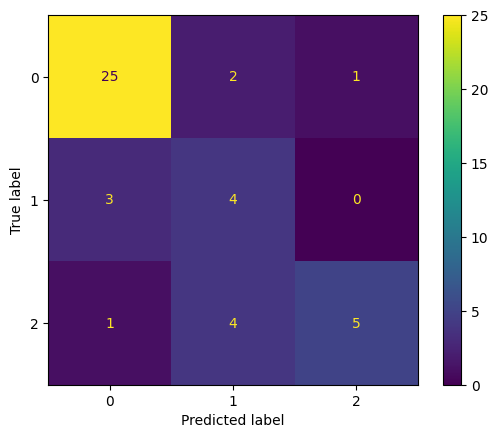

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Schritt 10: Erstelle eine Confusion Matrix basierend auf 'y_test_encoded' und 'y_predict', um detailliert zu analysieren, welche Fehler das Modell gemacht hat.
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_predict)